In [865]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [866]:
df = pd.read_csv('DataBase.csv')
df.head()

,time,MRU1,MRU2
0,0.003654,"{'ax': -6200, 'ay': -2392, 'az': 18076, 'gx': ...","{'ax': 0.225586, 'ay': 0.15625, 'az': -1.03759..."
1,0.020094,"{'ax': -7180, 'ay': -2368, 'az': 17100, 'gx': ...","{'ax': 0.244141, 'ay': 0.155762, 'az': -1.0698..."
2,0.036285,"{'ax': -5796, 'ay': -1260, 'az': 17916, 'gx': ...","{'ax': 0.193848, 'ay': 0.054688, 'az': -1.0693..."
3,0.052523,"{'ax': -4044, 'ay': 924, 'az': 15000, 'gx': -7...","{'ax': 0.15625, 'ay': -0.055664, 'az': -0.9760..."
4,0.068771,"{'ax': -2924, 'ay': 700, 'az': 13148, 'gx': -6...","{'ax': 0.106934, 'ay': -0.043945, 'az': -0.953..."


# PROCESSANDO DADOS

In [867]:
data = []

for i, row in df.iterrows():
    mru1 = eval(row['MRU1'])
    mru2 = eval(row['MRU2'])
    dic = {}

    for key, value in mru1.items():
        dic.update({f'mru1_{key}': value})

    for key, value in mru2.items():
        dic.update({f'mru2_{key}': value})

    dic.update({'time': row.time})
    data.append(dic)

df = pd.DataFrame(data)
df

,mru1_ax,mru1_ay,mru1_az,mru1_gx,mru1_gy,mru1_gz,mru2_ax,mru2_ay,mru2_az,mru2_gx,mru2_gy,mru2_gz,time
0,-6200,-2392,18076,-2801,524,12392,0.225586,0.156250,-1.037598,18.798830,-10.498050,-95.642090,0.003654
1,-7180,-2368,17100,-4954,2617,9622,0.244141,0.155762,-1.069824,34.362790,-24.841310,-75.317380,0.020094
2,-5796,-1260,17916,-6210,403,7348,0.193848,0.054688,-1.069336,44.555660,-6.286621,-59.753420,0.036285
3,-4044,924,15000,-7025,659,6196,0.156250,-0.055664,-0.976074,49.560550,-11.230470,-52.612300,0.052523
4,-2924,700,13148,-6079,1884,5546,0.106934,-0.043945,-0.953613,40.344240,-19.409180,-48.339840,0.068771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,-1332,1220,16176,174,-376,-141,0.017090,-0.081055,-1.032227,-2.380371,-2.563477,-1.281738,18.085546
1113,-1448,1200,16132,-160,-449,-147,0.028320,-0.079102,-1.036621,0.366211,-2.014160,-1.525879,18.101838
1114,-1684,1056,15896,-326,-444,-224,0.036133,-0.067383,-1.035156,0.671387,-1.953125,-0.366211,18.118046
1115,-1732,1052,15964,-182,-532,-397,0.041992,-0.068359,-1.037598,-0.061035,-0.671387,0.305176,18.134333


In [868]:
def normalizeTable(df, key, dt=0.15):
    df[key]  = df[key] - df[key][0] # INICIA NO TEMPO 0
    initTime = df[key].iloc[0]
    finalTime = df[key].iloc[-1] + dt
    newAxis = np.arange(initTime, finalTime, dt)
    df = df.set_index(key).reindex(newAxis, method='ffill')
    return df.reset_index().rename(columns={'index': key})


dt = 0.005
df = normalizeTable(df, 'time', dt)
df.head()

,time,mru1_ax,mru1_ay,mru1_az,mru1_gx,mru1_gy,mru1_gz,mru2_ax,mru2_ay,mru2_az,mru2_gx,mru2_gy,mru2_gz
0,0.000,-6200,-2392,18076,-2801,524,12392,0.225586,0.156250,-1.037598,18.79883,-10.49805,-95.64209
1,0.005,-6200,-2392,18076,-2801,524,12392,0.225586,0.156250,-1.037598,18.79883,-10.49805,-95.64209
2,0.010,-6200,-2392,18076,-2801,524,12392,0.225586,0.156250,-1.037598,18.79883,-10.49805,-95.64209
3,0.015,-6200,-2392,18076,-2801,524,12392,0.225586,0.156250,-1.037598,18.79883,-10.49805,-95.64209
4,0.020,-7180,-2368,17100,-4954,2617,9622,0.244141,0.155762,-1.069824,34.36279,-24.84131,-75.31738


- Obtendo a variável desejada

In [869]:
df = df.loc[(df.time > 2.0) & (df.time < 19)]
key = 'ax'
df.head()

,time,mru1_ax,mru1_ay,mru1_az,mru1_gx,mru1_gy,mru1_gz,mru2_ax,mru2_ay,mru2_az,mru2_gx,mru2_gy,mru2_gz
401,2.005,-3236,-392,16056,383,-1958,-7,0.129883,0.019531,-1.041016,-4.699707,8.972168,-1.892090
402,2.010,-3236,-392,16056,383,-1958,-7,0.129883,0.019531,-1.041016,-4.699707,8.972168,-1.892090
403,2.015,-3116,-444,15892,276,-1460,-57,0.123047,0.022461,-1.026367,-3.356934,5.187988,-1.403809
404,2.020,-3116,-444,15892,276,-1460,-57,0.123047,0.022461,-1.026367,-3.356934,5.187988,-1.403809
405,2.025,-3116,-444,15892,276,-1460,-57,0.123047,0.022461,-1.026367,-3.356934,5.187988,-1.403809


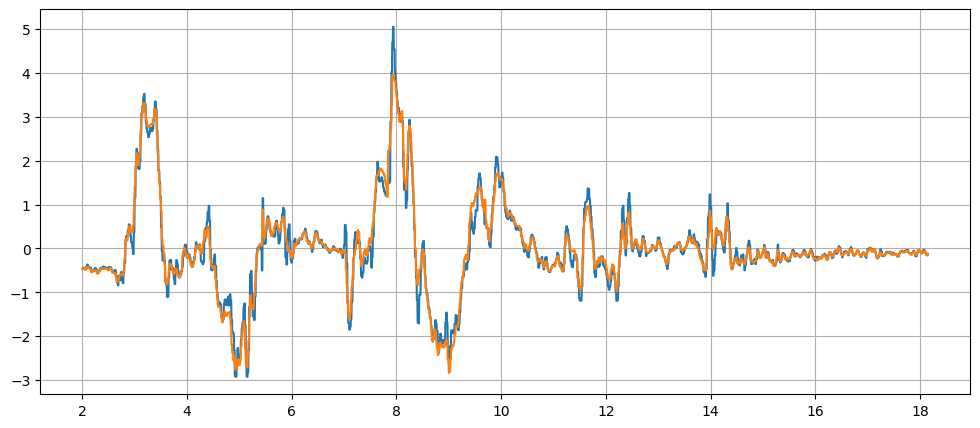

In [870]:
def normalize(data):
    return (data - np.mean(data))/np.std(data)

df[f'mru1_{key}'] = normalize(df[f'mru1_{key}'])
df[f'mru2_{key}'] = (-1)*normalize(df[f'mru2_{key}'])

plt.figure(figsize=(12, 5))
plt.plot(df.time, df[f'mru1_{key}'].values)
plt.plot(df.time, df[f'mru2_{key}'].values)
plt.grid()

# FUSÃO POR KALMAN

| Parâmetro | Tipo / Unidade          | Intuição prática (“tradução”)                                  | Como ajustar / escolher                                          |
|-----------|-------------------------|----------------------------------------------------------------|------------------------------------------------------------------|
| x0        | Escalar (mesma unidade) | Palpite inicial do valor real                                  | Use a 1ª leitura do sensor mais confiável ou um valor médio      |
| P0        | Escalar ≥ 0 (unidade²)  | Variância inicial → quão incerto você está sobre x0            | Grande ⇒ confia pouco no palpite; Pequeno ⇒ confia muito         |
| Q         | Escalar ≥ 0 (unidade²)  | Ruído do modelo → permite que o estado mude entre amostras      | Aumente para reagir mais rápido; diminua para suavizar           |
| R         | Matriz 3 × 3 (diag)     | Ruído de medição de cada sensor (σ² na diagonal)                | Coloque σ² de cada sensor; maior σ² ⇒ peso menor na fusão        |

In [871]:
import numpy as np

class KalmanFusion:
    def __init__(self, x0=0.0, P0=1e3, Q=1e-2, R=np.array([[1.0]])):
        self.x = float(x0)
        self.P = float(P0)
        self.Q = float(Q)
        self.R = np.array(R, dtype=float)
        self.H = np.ones((self.R.shape[0], 1))

    def predict(self):
        self.P += self.Q

    def update(self, z):
        z = np.asarray(z, dtype=float).ravel()
        S = self.P * (self.H @ self.H.T) + self.R  
        invS = np.linalg.inv(S)                    
        K = (self.P * (self.H.T @ invS)).ravel()   

        y = z - (self.H[:, 0] * self.x)   
        self.x += K.dot(y)

        self.P *= (1.0 - float(K.dot(self.H[:, 0])))
        return self.x

# FILTRO DE FREQUÊNCIA

In [872]:
class LaplaceFilter:
    num = []
    den = []
    
    def __init__(self, Ts=1.0, UP=0.1, dt=0.05, Tp=None):
        zeta = -np.log(UP)/np.sqrt(np.pi**2 + np.log(UP)**2)
        Wn   = 4/(zeta*Ts)

        if Tp is not None:
            Wn = np.pi/(Tp*np.sqrt(1 - zeta**2))

        s = ctl.TransferFunction.s
        C = Wn**2/(s**2 + 2*zeta*Wn*s + Wn**2)

        C_z = ctl.c2d(C, dt, method='tustin')
        self.num, self.den = self.getFraction(C_z)
        self.Xn = np.zeros_like(self.num)
        self.Yn = np.zeros_like(self.den)
        self.dt = dt

    def getFraction(self, G_z):
        num, den = ctl.tfdata(G_z)
        num = np.squeeze(num)
        den = np.squeeze(den)

        num = num/den[0]
        den = den/den[0]

        if type(num) == np.float64:
            num = np.array([num])

        num = [float(val) for val in num]
        den = [float(val) for val in den]
        return (num, den) 

    def compute(self):
        out = 0.0

        for i in range(0, len(self.num)):
            out += self.Xn[i]*(self.num[i])
        
        for i in range(1, len(self.den)):
            out += self.Yn[i]*(-1*self.den[i])

        return out

    def update(self, input):
        for n in range(len(self.num)-1, 0, -1):
            self.Xn[n] = self.Xn[n-1]

        for n in range(len(self.den)-1, 0, -1):
            self.Yn[n] = self.Yn[n-1]
        
        self.Xn[0] = input
        self.Yn[0] = self.compute()
        return self.Yn[0]

# FILTRAGEM ANTES

In [873]:
y1 = df[f'mru1_{key}'].values
y2 = df[f'mru2_{key}'].values

### FILTRANDO OS DADOS BRUTOS

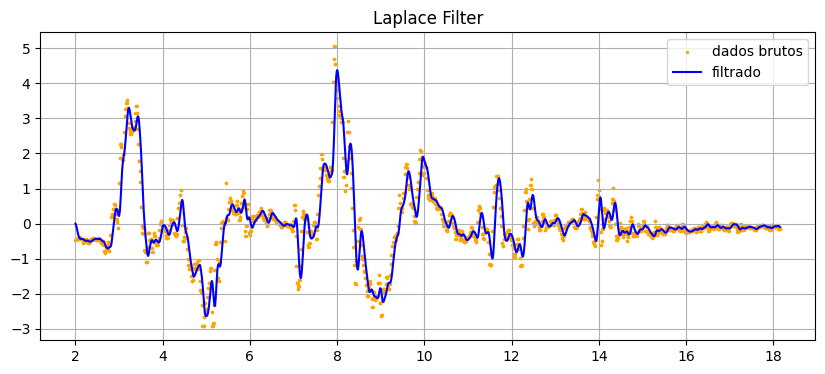

In [874]:
filter1 = LaplaceFilter(Ts=0.2, UP=0.05, dt=dt)
filter2 = LaplaceFilter(Ts=0.6, UP=0.05, dt=dt)
yr = y1
y1 = np.array([filter1.update(val) for val in y1])
y2 = np.array([filter2.update(val) for val in y2])

plt.figure(figsize=(10, 4))
plt.title(f'Laplace Filter')
plt.scatter(df.time, yr, s=2, color='orange', label='dados brutos')
plt.plot(df.time, y1, color='blue', label='filtrado')
plt.grid(), plt.legend()
plt.show()

### APLICANDO A FUSÃO NA SAÍDA

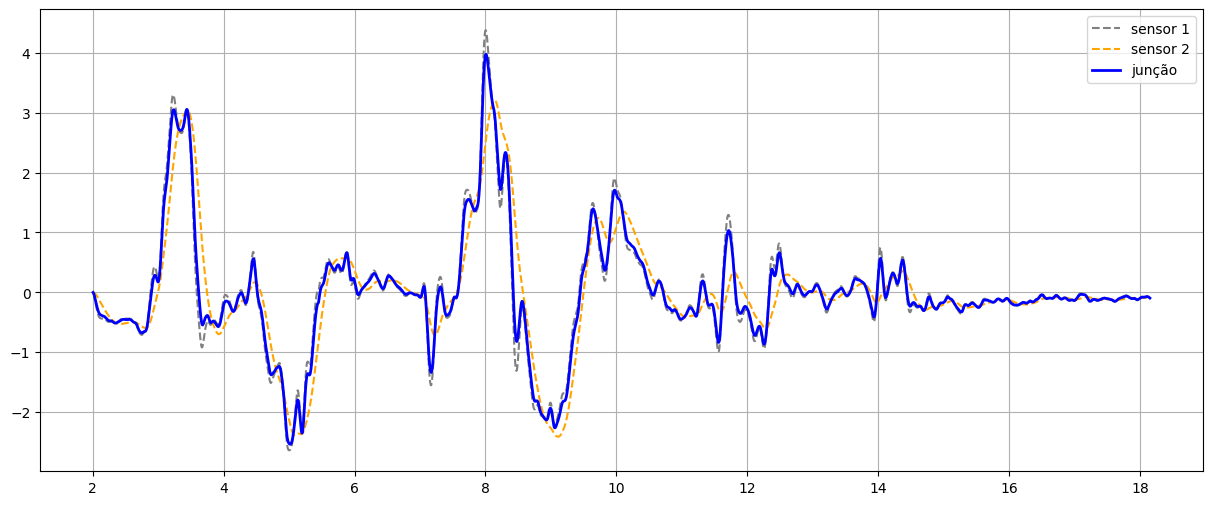

In [875]:
DELTA_SENSOR_1 = 0.45
DELTA_SENSOR_2 = 0.85

x0 = (y1[0] + y2[0])/2
P0 = 2**2
Q = 1.2
R = np.diag([DELTA_SENSOR_1**2, DELTA_SENSOR_2**2])  
kalman = KalmanFusion(x0, P0, Q, R)
yModel = np.zeros_like(y1)

for i in range(len(yModel)):
    data = np.array([y1[i], y2[i]])
    kalman.predict()

    output = kalman.update(data)
    yModel[i] = output


plt.figure(figsize=(15, 6))
plt.plot(df.time, y1, color='gray', label='sensor 1', linestyle='--')
plt.plot(df.time, y2, color='orange', label='sensor 2', linestyle='--')
plt.plot(df.time, yModel, color='blue', label='junção', linewidth=2)
plt.legend(), plt.grid()
plt.show()

- Zoom para melhorar visualização

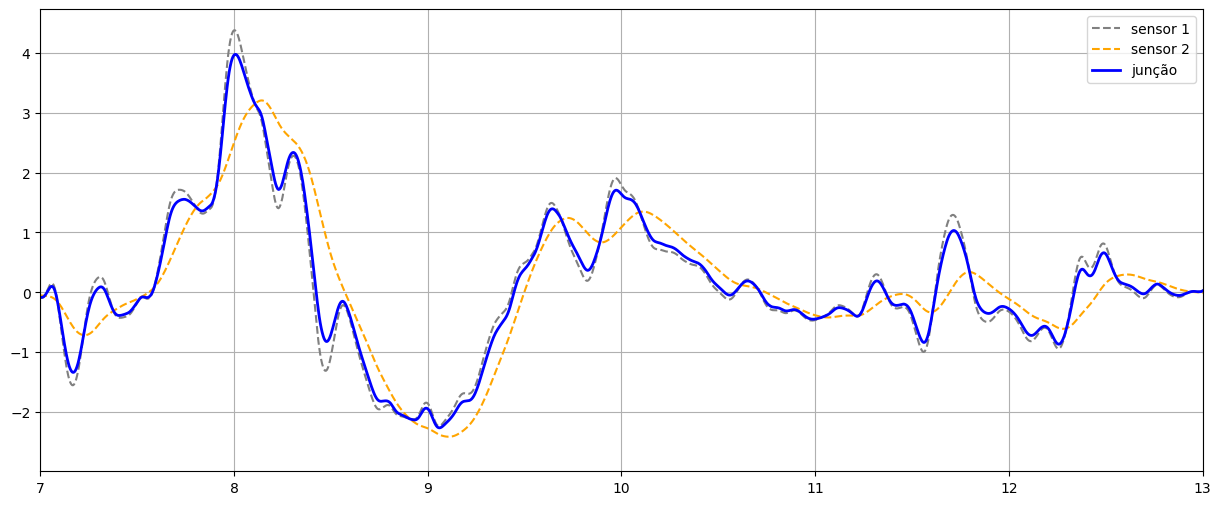

In [876]:
plt.figure(figsize=(15, 6))
plt.plot(df.time, y1, color='gray', label='sensor 1', linestyle='--')
plt.plot(df.time, y2, color='orange', label='sensor 2', linestyle='--')
plt.plot(df.time, yModel, color='blue', label='junção', linewidth=2)
plt.xlim(7, 13), plt.legend(), plt.grid()
plt.show()

- Comparando com média simples

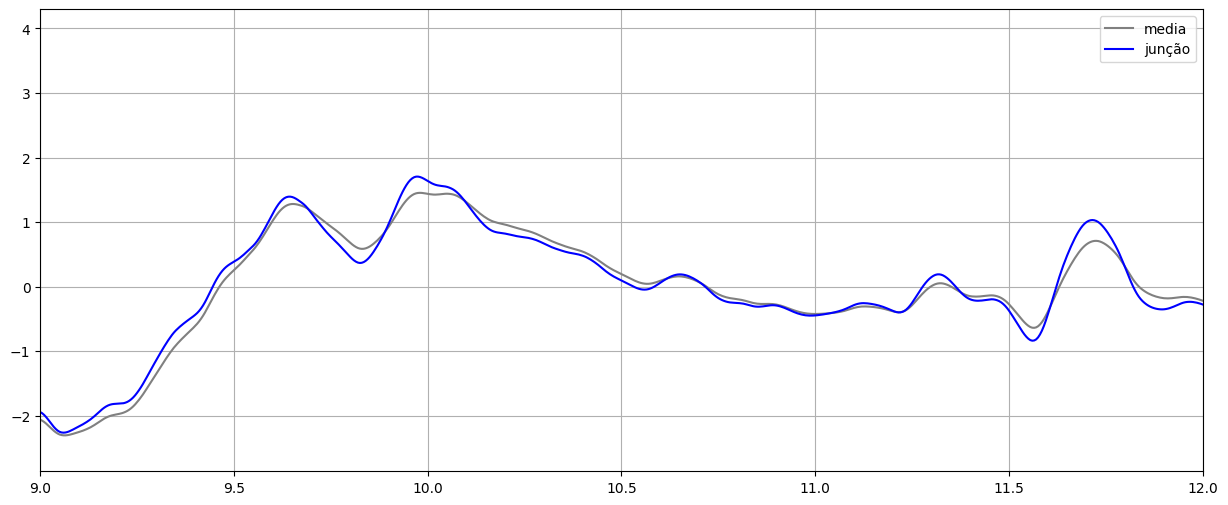

In [877]:
plt.figure(figsize=(15, 6))
plt.plot(df.time, (y1 + y2)/2, color='gray', label='media')
plt.plot(df.time, yModel, color='blue', label='junção')
plt.xlim(9, 12), plt.legend(), plt.grid()
plt.show()

# FILTRAGEM DEPOIS

In [878]:
y1 = df[f'mru1_{key}'].values
y2 = df[f'mru2_{key}'].values

### FUSÃO COM OS DADOS BRUTOS

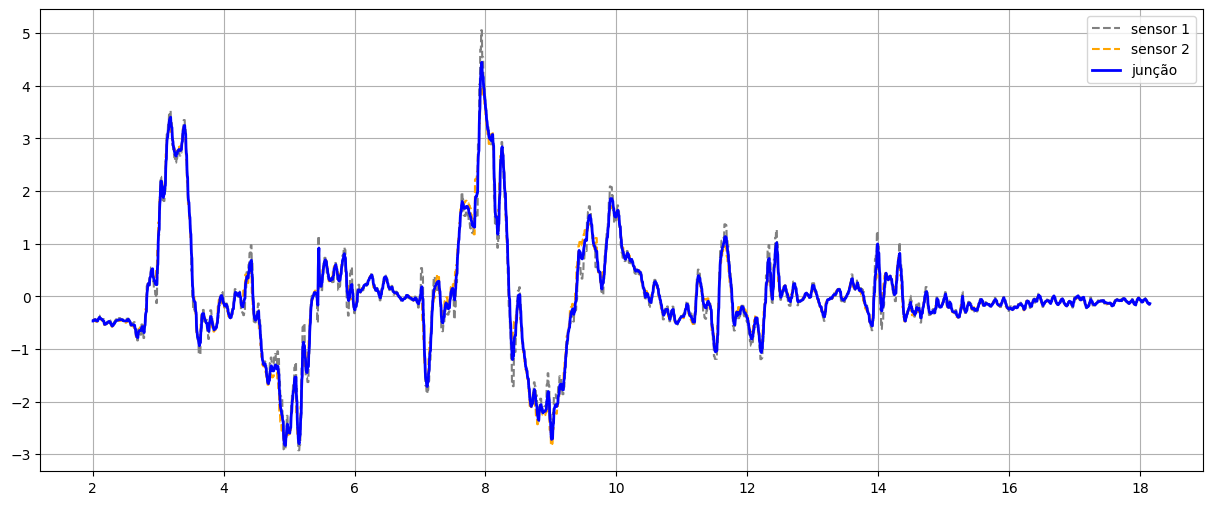

In [879]:
DELTA_SENSOR_1 = 1.80
DELTA_SENSOR_2 = 1.65

x0 = (y1[0] + y2[0])/2
P0 = 2**2
Q = 1.2
R = np.diag([DELTA_SENSOR_1**2, DELTA_SENSOR_2**2])  
kalman = KalmanFusion(x0, P0, Q, R)
yModel = np.zeros_like(y1)

for i in range(len(yModel)):
    data = np.array([y1[i], y2[i]])
    kalman.predict()

    output = kalman.update(data)
    yModel[i] = output


plt.figure(figsize=(15, 6))
plt.plot(df.time, y1, color='gray', label='sensor 1', linestyle='--')
plt.plot(df.time, y2, color='orange', label='sensor 2', linestyle='--')
plt.plot(df.time, yModel, color='blue', label='junção', linewidth=2)
plt.legend(), plt.grid()
plt.show()

- Zoom para melhorar visualização

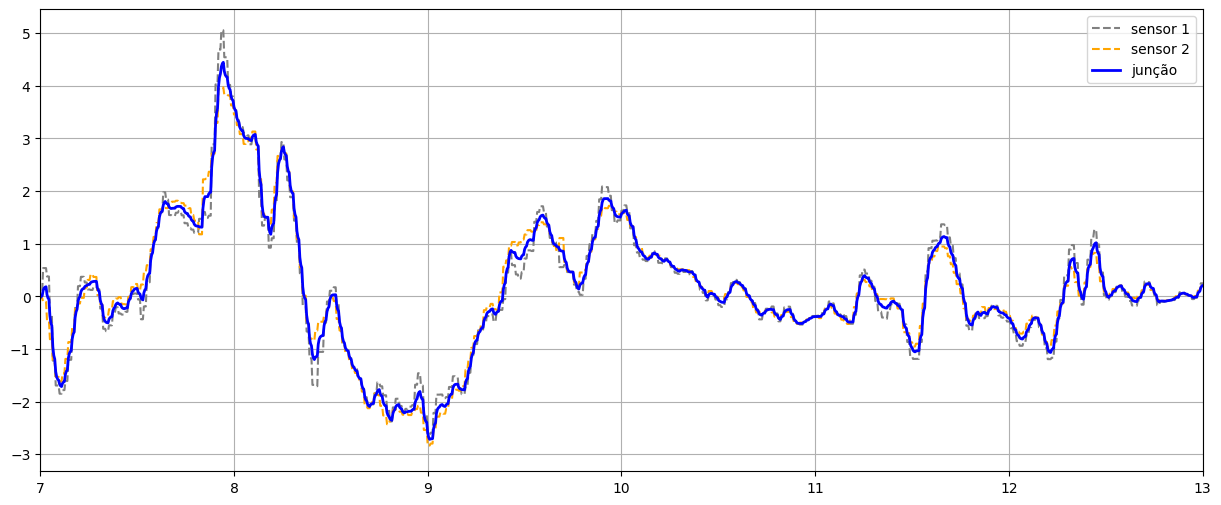

In [880]:
plt.figure(figsize=(15, 6))
plt.plot(df.time, y1, color='gray', label='sensor 1', linestyle='--')
plt.plot(df.time, y2, color='orange', label='sensor 2', linestyle='--')
plt.plot(df.time, yModel, color='blue', label='junção', linewidth=2)
plt.xlim(7, 13), plt.legend(), plt.grid()
plt.show()

### FILTRAGEM DA SAÍDA

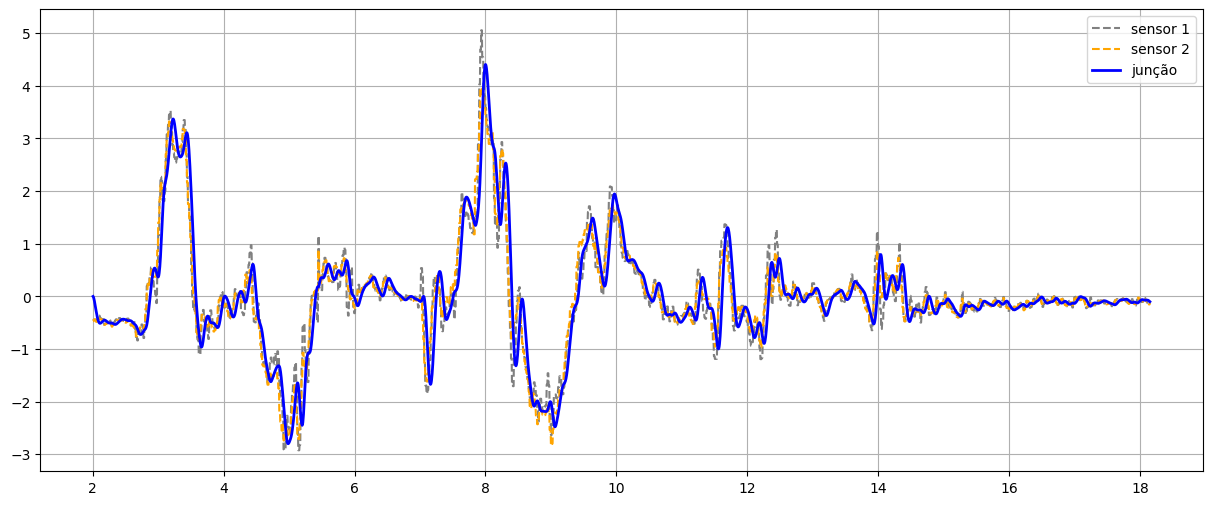

In [881]:
filter = LaplaceFilter(Ts=0.25, UP=0.15, dt=dt)
yModel = np.array([filter.update(val) for val in yModel])

plt.figure(figsize=(15, 6))
plt.plot(df.time, y1, color='gray', label='sensor 1', linestyle='--')
plt.plot(df.time, y2, color='orange', label='sensor 2', linestyle='--')
plt.plot(df.time, yModel, color='blue', label='junção', linewidth=2)
plt.legend(), plt.grid()
plt.show()

- Zoom para melhorar visualização

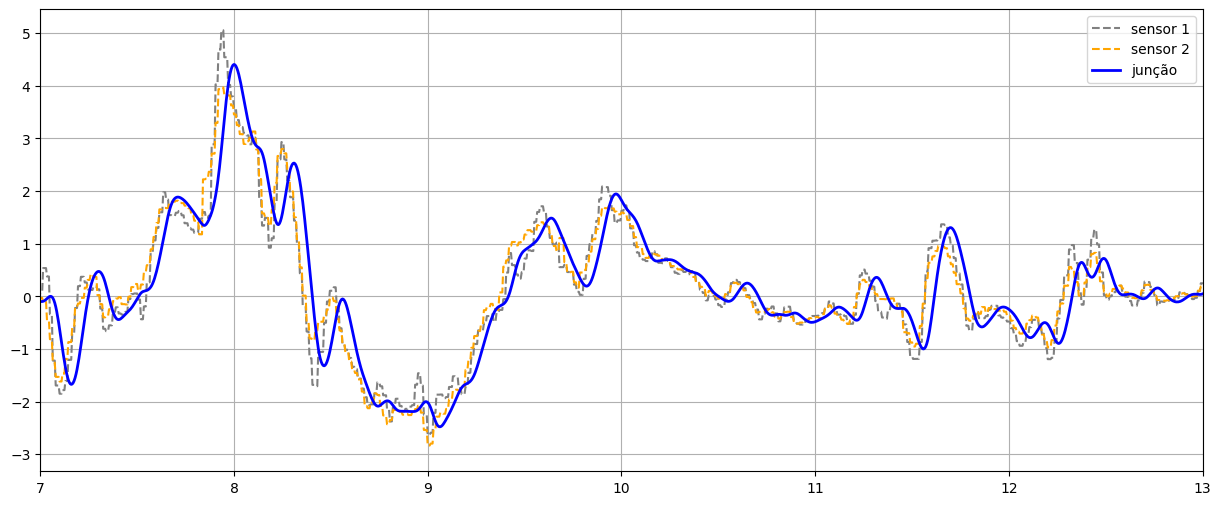

In [882]:
plt.figure(figsize=(15, 6))
plt.plot(df.time, y1, color='gray', label='sensor 1', linestyle='--')
plt.plot(df.time, y2, color='orange', label='sensor 2', linestyle='--')
plt.plot(df.time, yModel, color='blue', label='junção', linewidth=2)
plt.xlim(7, 13), plt.legend(), plt.grid()
plt.show()